In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [117]:
df = pd.read_csv('../timing_tests/run_time_tests.csv')
df = df.drop(0)

In [118]:
df.columns

Index(['mesh', 'boxsize', 'zs', 'steps', 'interp ', 'procs', 'vjp', 'jvp',
       'time'],
      dtype='object')

In [119]:
def select(df, props, vals):
    for p, v in zip(props, vals):
        df= df[df[p]==v]
    return df

In [120]:
PLOTPATH = '/global/homes/v/vboehm/codes/MADLens/figures'

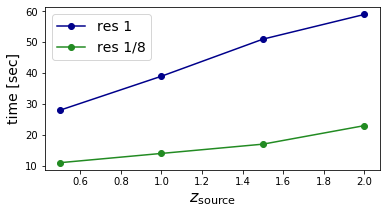

In [137]:
dd = select(df, ['interp ','steps'],[False,11])
d1 = select(dd, ['mesh','boxsize','procs'], [256, 256, 32])
d2 = select(dd, ['mesh','boxsize'], [128, 256])
plt.figure(figsize=(6,3))
plt.plot(d1['zs'], d1['time'],marker='o', label='res 1', color='darkblue')
plt.plot(d2['zs'], d2['time'],marker='o', label='res 1/8', color='forestgreen')
plt.legend(fontsize=14)
plt.ylabel('time [sec]', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'timing.pdf'),bbox_inches='tight')
plt.show()

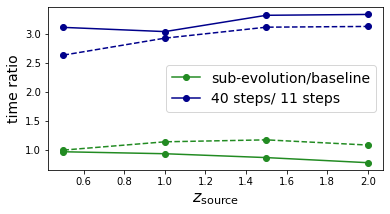

In [138]:
colors = ['forestgreen','darkblue']
plt.figure(figsize=(6,3))
for ii,(mesh, procs, ls) in enumerate(zip([128,256],[32,64],['--','-'])):
    dd = select(df, ['mesh','boxsize'],[mesh,256])
    d1 = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, False, False])
    d2 = select(dd, ['interp ','steps','procs'], [False, 11, procs])
    d3 = select(dd, ['interp ', 'steps','procs'], [False, 11, procs])
    d4 = select(dd, ['interp ','steps','procs'], [False, 40, procs])

    if ii==1:
        d = plt.plot(d1['zs'], d1['time'].to_numpy()/d2['time'],marker='o', ls=ls, color=colors[0], label='sub-evolution/baseline')
        plt.plot(d2['zs'], d4['time'].to_numpy()/d3['time'],marker='o',ls=ls,color= colors[1],label='40 steps/ 11 steps')
    else:
        d = plt.plot(d1['zs'], d1['time'].to_numpy()/d2['time'],marker='o', ls=ls, color=colors[0])
        plt.plot(d2['zs'], d4['time'].to_numpy()/d3['time'],marker='o',ls=ls,color= colors[1])
plt.legend(fontsize=14)
plt.ylabel('time ratio', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'timing_ratios.pdf'),bbox_inches='tight')
plt.show()

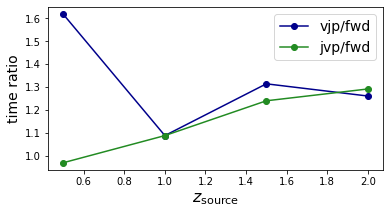

In [139]:
dd = select(df, ['mesh','boxsize'],[256,256])

d_vjp = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, True, False])
d_jvp = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, False, True])
d_fwd = select(dd, ['interp ', 'steps', 'vjp', 'jvp'], [True, 11, False, False])

plt.figure(figsize=(6,3))
plt.plot(d_vjp['zs'], d_vjp['time'].to_numpy()/d_fwd['time']-1,marker='o', label='vjp/fwd', color='darkblue')
plt.plot(d_jvp['zs'], d_jvp['time'].to_numpy()/d_fwd['time']-1,marker='o', label='jvp/fwd', color='forestgreen')
plt.legend(fontsize=14)
plt.ylabel('time ratio', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'vjp_jvp_timing.pdf'),bbox_inches='tight')
plt.show()

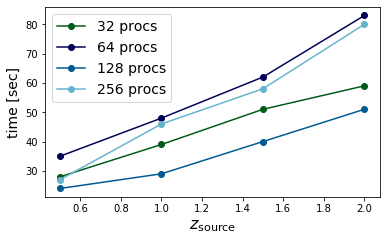

In [142]:
from matplotlib import cm
dd = select(df, ['mesh','boxsize'],[256,256])
cm_subsection = np.linspace(0.1, 0.8, 4) 

colors = [ cm.ocean(x) for x in cm_subsection ]

plt.figure(figsize=(6,3.5))
for ii, procs in enumerate([32.,64.,128.,256.]):
    d_1 = select(dd, ['interp ', 'steps', 'vjp', 'jvp','procs'], [False, 11, False, False, procs])

    plt.plot(d_1['zs'], d_1['time'].to_numpy(),marker='o', color=colors[ii],label='%d procs'%procs)

plt.legend(fontsize=14,ncol=1)
plt.ylabel('time [sec]', fontsize=14)
plt.xlabel('$z_\mathrm{source}$', fontsize=16)
plt.savefig(os.path.join(PLOTPATH,'timing_procs.pdf'),bbox_inches='tight')
plt.show()